In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.interpolate import splrep,splev
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


import matplotlib.font_manager as font_manager

plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.tick_params(axis='both', which='minor', labelsize=18)
import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.close()
import matplotlib.gridspec as gs
from mpl_toolkits.mplot3d import Axes3D

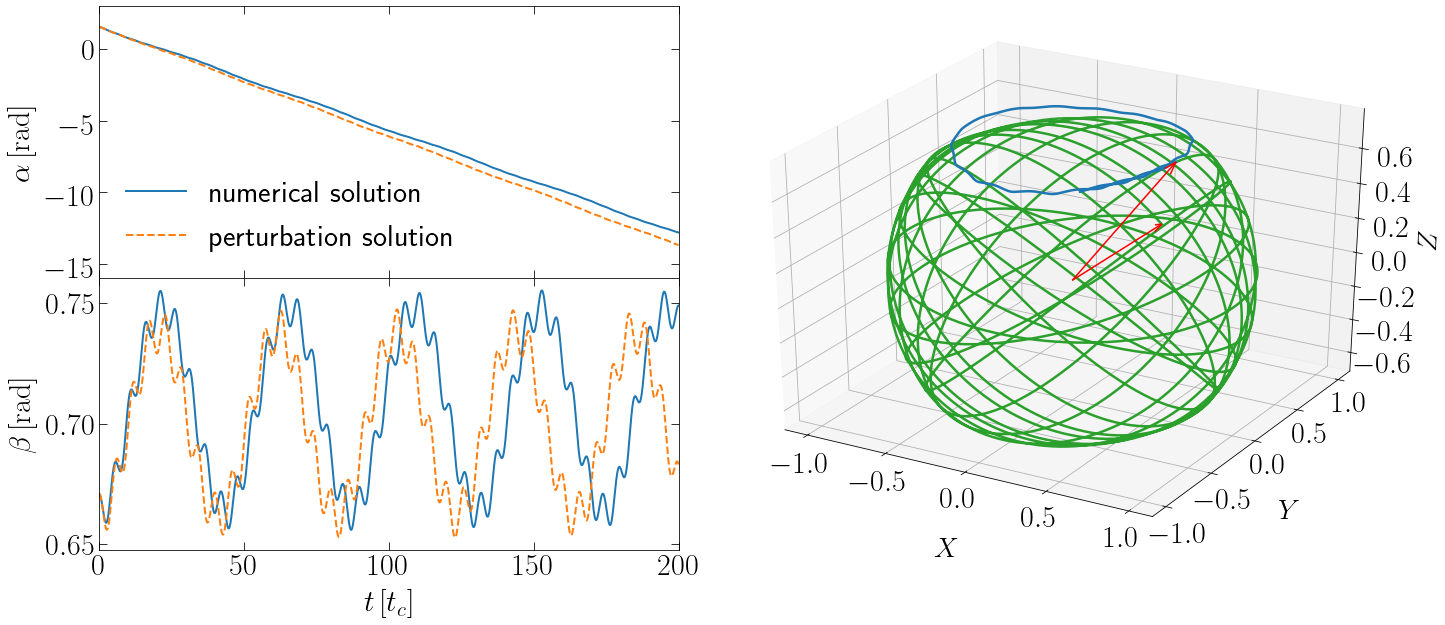

In [9]:
data = np.genfromtxt('data3/sp1.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 10000 (sp1, sp2), 5000 (tp1), 3333 (tp2)
Ntrim = 10000
c01=c0[:Ntrim]
c11=c1[:Ntrim]
c21=c2[:Ntrim]
c31=c3[:Ntrim]
c41=c4[:Ntrim]


fig = plt.figure(figsize=(24,10))

gs1=gs.GridSpec(nrows=2,ncols=2,hspace=0,wspace=0.01, width_ratios=[1,1.3])

ax1=plt.subplot(gs1[0,0])
ax1.tick_params(axis="x", labelbottom=0)
ax2=plt.subplot(gs1[1,0], sharex=ax1)

ax1.set_ylabel(r'$ \alpha \, [\rm rad]$', fontsize=30)
ax2.set_ylabel(r'$ \beta \, [\rm rad]$', fontsize=30)
ax2.set_xlabel(r'$t \,[t_c]$', fontsize=30)
    
ax1.plot(c01, c11, label='numerical solution', linewidth=2)
ax1.plot(c01, c21, linestyle='--', label='perturbation solution', linewidth=2)
ax1.set_ylim(-16,3)
# ax1.set_yticks([0,5,10,15])
ax2.plot(c01, c31, linewidth=2)
ax2.plot(c01, c41, linestyle='--', linewidth=2)
ax2.set_xlim(np.min(c01), np.max(c01))
ax1.legend(loc='lower left', fontsize=30, frameon=False)

ax3=plt.subplot(gs1[0:2,1],projection='3d')
ax3.set_xlabel('\n' + r'$X$', linespacing=4,fontsize=28)
ax3.set_ylabel('\n' + r'$Y$', linespacing=4,fontsize=28)
ax3.set_zlabel('\n' +'\n'+ r'$Z$', linespacing=1,fontsize=28)
ax3.tick_params(axis='z', which='major', pad=12)


data = np.genfromtxt('data3/sp1.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 5000 (sp1), 8000 (sp2), 1000 (tp1), 5000 (tp2)
Ntrim = 5000
c51=c5[:Ntrim]
c61=c6[:Ntrim]
c71=c7[:Ntrim]
c81=c8[:Ntrim]
c91=c9[:Ntrim]
c101=c10[:Ntrim]
    

alr = 0.08

ax3.quiver(0, 0, 0, c8[0], c9[0], c10[0], color='red', arrow_length_ratio = alr)
ax3.quiver(0, 0, 0, c5[0], c6[0], c7[0], color='red', arrow_length_ratio = alr, length = 1)
#ax.quiver(0, 0, 0, c9[0]*c7[0]-c10[0]*c6[0], c10[0]*c5[0]-c8[0]*c7[0], c8[0]*c6[0]-c9[0]*c5[0], color='red', arrow_length_ratio = alr, length = 0.4)

#ax.quiver(0, 0, 0, c8[Ntrim-1], c9[Ntrim-1], c10[Ntrim-1], color='red', arrow_length_ratio = alr, linestyle = ':')
#ax.quiver(0, 0, 0, c5[Ntrim-1], c6[Ntrim-1], c7[Ntrim-1], color='red', arrow_length_ratio = alr, length = 1, linestyle = ':')
#ax.quiver(0, 0, 0, c9[Ntrim-1]*c7[Ntrim-1]-c10[Ntrim-1]*c6[Ntrim-1], c10[Ntrim-1]*c5[Ntrim-1]-c8[Ntrim-1]*c7[Ntrim-1], c8[Ntrim-1]*c6[Ntrim-1]-c9[Ntrim-1]*c5[Ntrim-1], color='green', arrow_length_ratio = alr, length = 0.4)

ax3.plot(c51,c61,c71, color='tab:green' , linewidth=2.5)
ax3.plot(c81,c91,c101, color='tab:blue',linewidth=2.5 )
plt.savefig("fig_fig4.pdf", format='pdf', bbox_inches="tight")

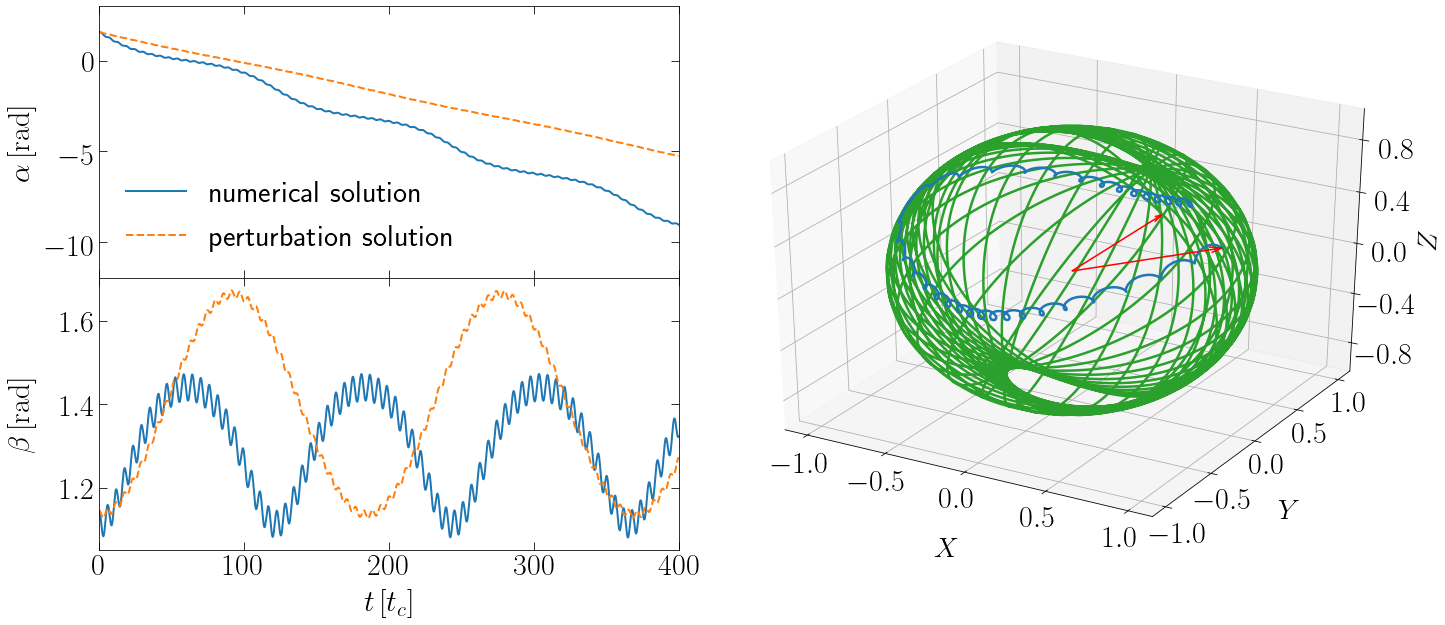

In [12]:
data = np.genfromtxt('data3/sp2.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 10000 (sp1, sp2), 5000 (tp1), 3333 (tp2)
Ntrim = 10000
c01=c0[:Ntrim]
c11=c1[:Ntrim]
c21=c2[:Ntrim]
c31=c3[:Ntrim]
c41=c4[:Ntrim]


fig = plt.figure(figsize=(24,10))

gs1=gs.GridSpec(nrows=2,ncols=2,hspace=0,wspace=0.01, width_ratios=[1,1.3])

ax1=plt.subplot(gs1[0,0])
ax1.tick_params(axis="x", labelbottom=0)
ax2=plt.subplot(gs1[1,0], sharex=ax1)

ax1.set_ylabel(r'$ \alpha \, [\rm rad]$', fontsize=30)
ax2.set_ylabel(r'$ \beta \, [\rm rad]$', fontsize=30)
ax2.set_xlabel(r'$t \,[t_c]$', fontsize=30)
    
ax1.plot(c01, c11, label='numerical solution', linewidth=2)
ax1.plot(c01, c21, linestyle='--', label='perturbation solution', linewidth=2)
ax2.plot(c01, c31, linewidth=2)
ax2.plot(c01, c41, linestyle='--', linewidth=2)
ax2.set_xlim(np.min(c01), np.max(c01))
ax1.legend(loc='best', fontsize=30, frameon=False)
ax1.set_ylim(-12,3)
ax1.set_yticks([-10,-5,0])

ax3=plt.subplot(gs1[0:2,1],projection='3d')
ax3.set_xlabel('\n' + r'$X$', linespacing=4,fontsize=28)
ax3.set_ylabel('\n' + r'$Y$', linespacing=4,fontsize=28)
ax3.set_zlabel('\n' +'\n'+ r'$Z$', linespacing=1,fontsize=28)
ax3.tick_params(axis='z', which='major', pad=12)
ax3.set_zticks([-0.8,-0.4,0,0.4,0.8])

data = np.genfromtxt('data3/sp2.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 5000 (sp1), 8000 (sp2), 1000 (tp1), 5000 (tp2)
Ntrim = 5000
c51=c5[:Ntrim]
c61=c6[:Ntrim]
c71=c7[:Ntrim]
c81=c8[:Ntrim]
c91=c9[:Ntrim]
c101=c10[:Ntrim]
    

alr = 0.08

ax3.quiver(0, 0, 0, c8[0], c9[0], c10[0], color='red', arrow_length_ratio = alr)
ax3.quiver(0, 0, 0, c5[0], c6[0], c7[0], color='red', arrow_length_ratio = alr, length = 1)
#ax.quiver(0, 0, 0, c9[0]*c7[0]-c10[0]*c6[0], c10[0]*c5[0]-c8[0]*c7[0], c8[0]*c6[0]-c9[0]*c5[0], color='red', arrow_length_ratio = alr, length = 0.4)

#ax.quiver(0, 0, 0, c8[Ntrim-1], c9[Ntrim-1], c10[Ntrim-1], color='red', arrow_length_ratio = alr, linestyle = ':')
#ax.quiver(0, 0, 0, c5[Ntrim-1], c6[Ntrim-1], c7[Ntrim-1], color='red', arrow_length_ratio = alr, length = 1, linestyle = ':')
#ax.quiver(0, 0, 0, c9[Ntrim-1]*c7[Ntrim-1]-c10[Ntrim-1]*c6[Ntrim-1], c10[Ntrim-1]*c5[Ntrim-1]-c8[Ntrim-1]*c7[Ntrim-1], c8[Ntrim-1]*c6[Ntrim-1]-c9[Ntrim-1]*c5[Ntrim-1], color='green', arrow_length_ratio = alr, length = 0.4)

ax3.plot(c51,c61,c71, color='tab:green' , linewidth=2.5)
ax3.plot(c81,c91,c101, color='tab:blue',linewidth=2.5 )
fig.align_labels()
plt.savefig("fig_fig5.pdf", format='pdf', bbox_inches="tight")

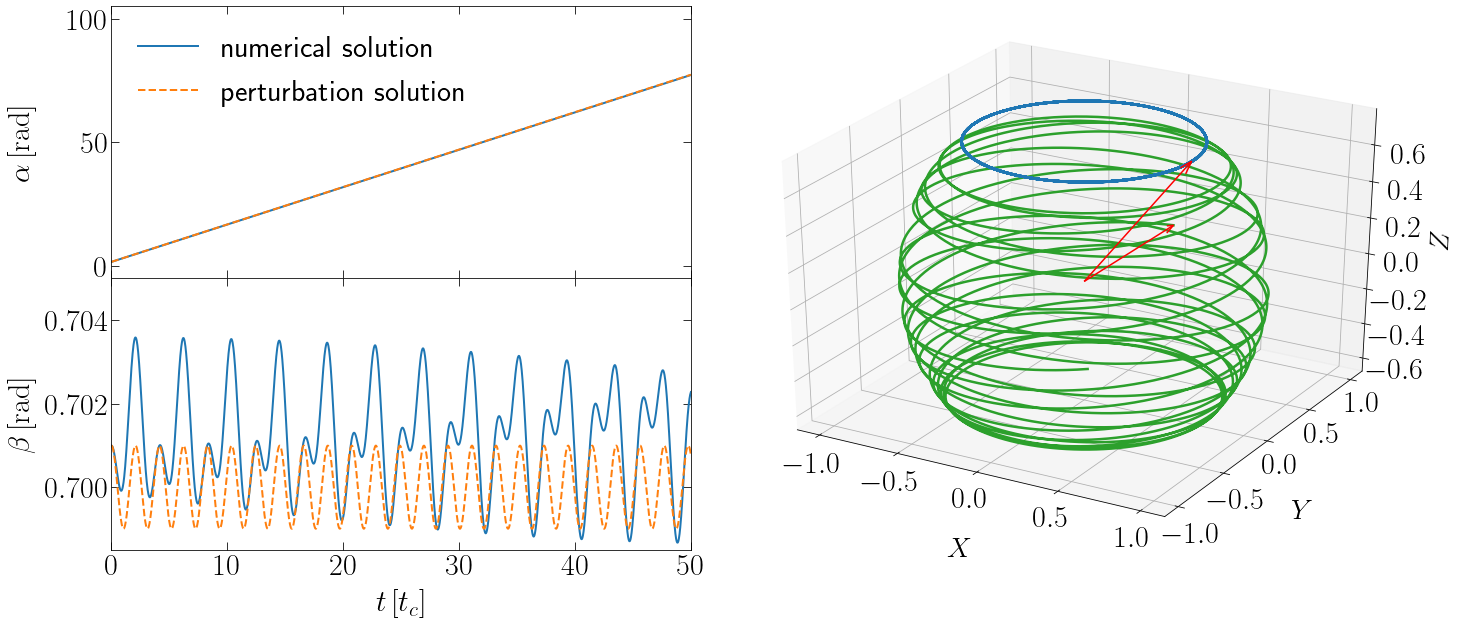

In [16]:
data = np.genfromtxt('data3/tp1.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 10000 (sp1, sp2), 5000 (tp1), 3333 (tp2)
Ntrim = 5000
c01=c0[:Ntrim]
c11=c1[:Ntrim]
c21=c2[:Ntrim]
c31=c3[:Ntrim]
c41=c4[:Ntrim]


fig = plt.figure(figsize=(24,10))

gs1=gs.GridSpec(nrows=2,ncols=2,hspace=0,wspace=0.01, width_ratios=[1,1.3])

ax1=plt.subplot(gs1[0,0])
ax1.tick_params(axis="x", labelbottom=0)
ax2=plt.subplot(gs1[1,0], sharex=ax1)

ax1.set_ylabel(r'$ \alpha \, [\rm rad]$', fontsize=30)
ax2.set_ylabel(r'$ \beta \, [\rm rad]$', fontsize=30)
ax2.set_xlabel(r'$t \,[t_c]$', fontsize=30)
    
ax1.plot(c01, c11, label='numerical solution', linewidth=2)
ax1.plot(c01, c21, linestyle='--', label='perturbation solution', linewidth=2)
ax1.set_ylim(-5,105)
ax2.plot(c01, c31, linewidth=2)
ax2.plot(c01, c41, linestyle='--', linewidth=2)
ax2.set_xlim(np.min(c01), 50)
ax1.legend(loc='upper left', fontsize=30, frameon=False)
ax2.set_yticks([0.700,0.702,0.704])
ax2.set_ylim(0.6985,0.705)
ax3=plt.subplot(gs1[0:2,1],projection='3d')
ax3.set_xlabel('\n' + r'$X$', linespacing=4,fontsize=28)
ax3.set_ylabel('\n' + r'$Y$', linespacing=4,fontsize=28)
ax3.set_zlabel('\n' +'\n'+ r'$Z$', linespacing=1,fontsize=28)
ax3.tick_params(axis='z', which='major', pad=12)


data = np.genfromtxt('data3/tp1.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 5000 (sp1), 8000 (sp2), 1000 (tp1), 5000 (tp2)
Ntrim = 5000
c51=c5[:Ntrim]
c61=c6[:Ntrim]
c71=c7[:Ntrim]
c81=c8[:Ntrim]
c91=c9[:Ntrim]
c101=c10[:Ntrim]
    

alr = 0.08

ax3.quiver(0, 0, 0, c8[0], c9[0], c10[0], color='red', arrow_length_ratio = alr)
ax3.quiver(0, 0, 0, c5[0], c6[0], c7[0], color='red', arrow_length_ratio = alr, length = 1)
#ax.quiver(0, 0, 0, c9[0]*c7[0]-c10[0]*c6[0], c10[0]*c5[0]-c8[0]*c7[0], c8[0]*c6[0]-c9[0]*c5[0], color='red', arrow_length_ratio = alr, length = 0.4)

#ax.quiver(0, 0, 0, c8[Ntrim-1], c9[Ntrim-1], c10[Ntrim-1], color='red', arrow_length_ratio = alr, linestyle = ':')
#ax.quiver(0, 0, 0, c5[Ntrim-1], c6[Ntrim-1], c7[Ntrim-1], color='red', arrow_length_ratio = alr, length = 1, linestyle = ':')
#ax.quiver(0, 0, 0, c9[Ntrim-1]*c7[Ntrim-1]-c10[Ntrim-1]*c6[Ntrim-1], c10[Ntrim-1]*c5[Ntrim-1]-c8[Ntrim-1]*c7[Ntrim-1], c8[Ntrim-1]*c6[Ntrim-1]-c9[Ntrim-1]*c5[Ntrim-1], color='green', arrow_length_ratio = alr, length = 0.4)

ax3.plot(c51,c61,c71, color='tab:green' , linewidth=2.5)
ax3.plot(c81,c91,c101, color='tab:blue',linewidth=2.5 )
fig.align_labels()
plt.savefig("fig_fig2.pdf", format='pdf', bbox_inches="tight")

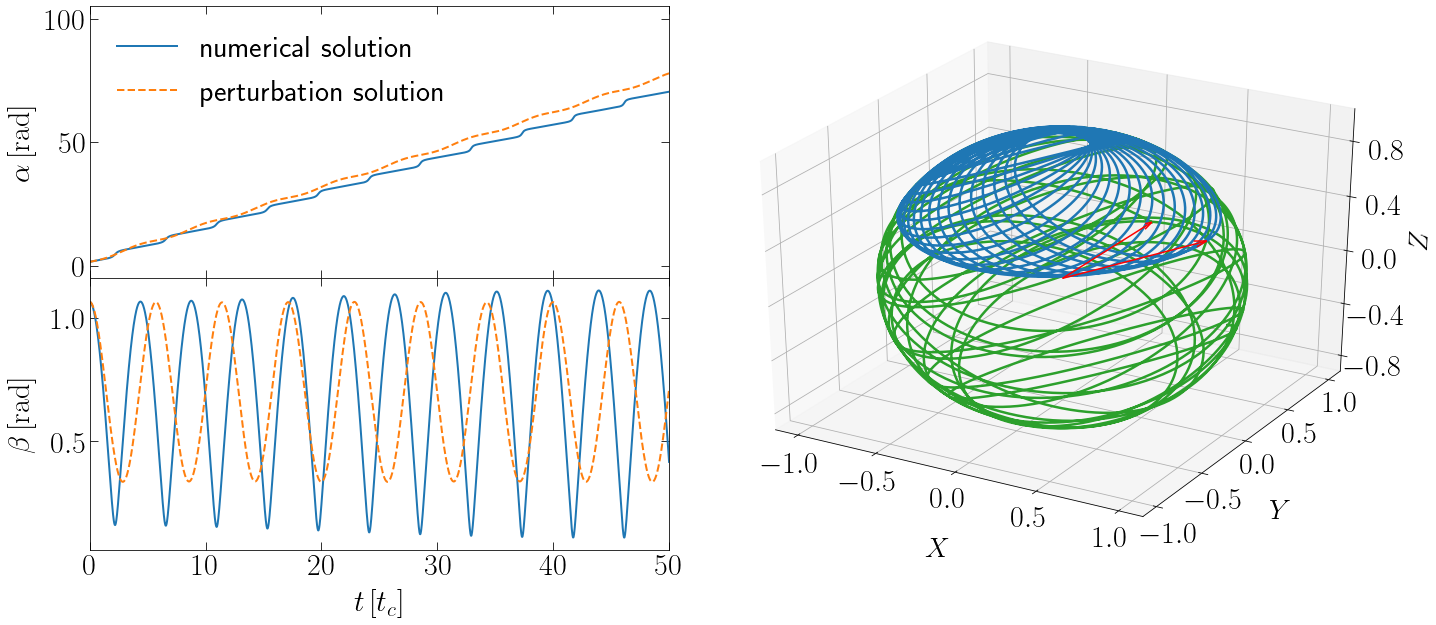

In [17]:
data = np.genfromtxt('data3/tp2.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 10000 (sp1, sp2), 5000 (tp1), 3333 (tp2)
Ntrim = 5000
c01=c0[:Ntrim]
c11=c1[:Ntrim]
c21=c2[:Ntrim]
c31=c3[:Ntrim]
c41=c4[:Ntrim]


fig = plt.figure(figsize=(24,10))

gs1=gs.GridSpec(nrows=2,ncols=2,hspace=0,wspace=0.01, width_ratios=[1,1.3])

ax1=plt.subplot(gs1[0,0])
ax1.tick_params(axis="x", labelbottom=0)
ax2=plt.subplot(gs1[1,0], sharex=ax1)

ax1.set_ylabel(r'$ \alpha \, [\rm rad]$', fontsize=30)
ax2.set_ylabel(r'$ \beta \, [\rm rad]$', fontsize=30)
ax2.set_xlabel(r'$t \,[t_c]$', fontsize=30)
    
ax1.plot(c01, c11, label='numerical solution', linewidth=2)
ax1.plot(c01, c21, linestyle='--', label='perturbation solution', linewidth=2)
ax1.set_ylim(-5,105)
ax2.plot(c01, c31, linewidth=2)
ax2.plot(c01, c41, linestyle='--', linewidth=2)
ax2.set_xlim(np.min(c01), np.max(c01))
ax1.legend(loc='best', fontsize=30, frameon=False)
ax2.set_xlim(0,50)

ax3=plt.subplot(gs1[0:2,1],projection='3d')
ax3.set_xlabel('\n' + r'$X$', linespacing=4,fontsize=28)
ax3.set_ylabel('\n' + r'$Y$', linespacing=4,fontsize=28)
ax3.set_zlabel('\n' +'\n'+ r'$Z$', linespacing=1,fontsize=28)
ax3.tick_params(axis='z', which='major', pad=12)
ax3.set_zticks([-0.8,-0.4,0,0.4,0.8])

data = np.genfromtxt('data3/tp2.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 5000 (sp1), 8000 (sp2), 1000 (tp1), 5000 (tp2)
Ntrim = 5000
c51=c5[:Ntrim]
c61=c6[:Ntrim]
c71=c7[:Ntrim]
c81=c8[:Ntrim]
c91=c9[:Ntrim]
c101=c10[:Ntrim]
    

alr = 0.08

ax3.quiver(0, 0, 0, c8[0], c9[0], c10[0], color='red', arrow_length_ratio = alr)
ax3.quiver(0, 0, 0, c5[0], c6[0], c7[0], color='red', arrow_length_ratio = alr, length = 1)
#ax.quiver(0, 0, 0, c9[0]*c7[0]-c10[0]*c6[0], c10[0]*c5[0]-c8[0]*c7[0], c8[0]*c6[0]-c9[0]*c5[0], color='red', arrow_length_ratio = alr, length = 0.4)

#ax.quiver(0, 0, 0, c8[Ntrim-1], c9[Ntrim-1], c10[Ntrim-1], color='red', arrow_length_ratio = alr, linestyle = ':')
#ax.quiver(0, 0, 0, c5[Ntrim-1], c6[Ntrim-1], c7[Ntrim-1], color='red', arrow_length_ratio = alr, length = 1, linestyle = ':')
#ax.quiver(0, 0, 0, c9[Ntrim-1]*c7[Ntrim-1]-c10[Ntrim-1]*c6[Ntrim-1], c10[Ntrim-1]*c5[Ntrim-1]-c8[Ntrim-1]*c7[Ntrim-1], c8[Ntrim-1]*c6[Ntrim-1]-c9[Ntrim-1]*c5[Ntrim-1], color='green', arrow_length_ratio = alr, length = 0.4)

ax3.plot(c51,c61,c71, color='tab:green' , linewidth=2.5)
ax3.plot(c81,c91,c101, color='tab:blue',linewidth=2.5 )
fig.align_labels()
plt.savefig("fig_fig3.pdf", format='pdf', bbox_inches="tight")